<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Converting-QUIP-Workflows-to-libRascal" data-toc-modified-id="Converting-QUIP-Workflows-to-libRascal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Converting QUIP Workflows to libRascal</a></span><ul class="toc-item"><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing data</a></span></li><li><span><a href="#A-simple-descriptor:-pairwise-distances" data-toc-modified-id="A-simple-descriptor:-pairwise-distances-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A simple descriptor: pairwise distances</a></span></li><li><span><a href="#A-many-body-descriptor:-SOAP" data-toc-modified-id="A-many-body-descriptor:-SOAP-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>A many-body descriptor: SOAP</a></span></li></ul></li></ul></div>

# Converting QUIP Workflows to libRascal

Welcome to libRascal!

As you've seen in the last section, there is a lot that librascal can do efficiently. Perhaps the most important functionality is computing atomic descriptors. Here, we'll focus on converting a classic QUIP workflow for atomic descriptors to libRascal.


We will be mirroring parts of the [quippy descriptor tutorial](https://libatoms.github.io/QUIP/Tutorials/quippy-descriptor-tutorial.html), albeit with different molecules.

For more information on _nuances of tutorial_, please refer to (among others): 
- [Title (Surname Year)](url) 
- [Title (Surname Year)](url)

Beyond libRascal, the packages used in this tutorial are:  [pkg](url), [pkg](url), and [pkg](url).

**WARNING** Some quippy installations are only Python2 compatible. Please check that the notebook kernel corresponds to the python version supported by your quippy installation.

In [46]:
%matplotlib inline

# may omit in final version
%reload_ext autoreload
%autoreload 2 

import os
import time
import sys

import numpy as np
import ase
from ase.io import read
import quippy 
from quippy import descriptors
from matplotlib import pyplot as plt
import json


wd=!(pwd)
sys.path.append(f'{wd[0]}/utilities')
from rascal.representations import SphericalInvariants as SOAP

## Importing data

We'll start out examples by computing the SOAP vectors for a benzene ring.

In [47]:
benzene = read(f'{wd[0]}/data/molecules/benzene.xyz')

## A simple descriptor: pairwise distances

With quippy, you can compute pairwise distances with a cutoff of 1.5 Angstrom using:

In [48]:
desc = descriptors.Descriptor("distance_2b Z1=6 Z2=6 cutoff=4")

In [49]:
d=desc.calc(benzene)

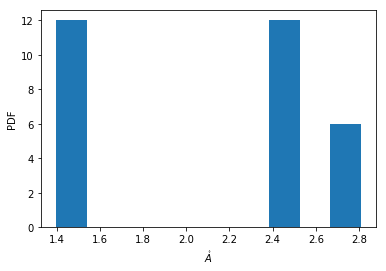

In [56]:
import matplotlib.pyplot as plt
plt.hist(d['data'])
plt.gca().set_ylabel("PDF")
plt.gca().set_xlabel(r"$\mathring{A}$")
plt.show()

With librascal, we can get the same results with ?????? 

## A many-body descriptor: SOAP

In [69]:
desc = descriptors.Descriptor("soap cutoff=3 \
                              l_max=4 n_max=4 \
                              atom_sigma=0.5 \
                              n_Z=1 Z={6} ")

In [70]:
desc.n_dim

51

In [71]:
d=desc.calc(benzene)

In [73]:
soap = SOAP(
           soap_type='PowerSpectrum',
           interaction_cutoff=3,
           max_radial=4,
           max_angular=4,
           gaussian_sigma_type='Constant',
           gaussian_sigma_constant=0.5,
           cutoff_smooth_width=0.5,
    
           )

In [81]:
sv = soap.transform(benzene).get_dense_feature_matrix(soap)

sv_inds = [0,2,4,6,8,10]

In [78]:
d['data'].shape

(6, 51)

In [80]:
benzene.symbols

Symbols('CHCHCHCHCHCH')